In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
# Reading the files
employees = pd.read_csv("employees.csv")
performance = pd.read_csv("performance.csv")

In [15]:
# Checking for Null/Missing values
employees.dropna(inplace=True)
performance.dropna(inplace=True)

In [16]:
# Changing to DateTime format
employees['DateOfJoining'] = pd.to_datetime(employees['DateOfJoining'], format='%Y-%m-%d')
performance['Month'] = pd.to_datetime(performance['Month'], format='%Y-%m')

In [17]:
# Calculating Tenure of Employees
now = pd.Timestamp.now()
employees['Tenure'] = ((now - employees['DateOfJoining']).dt.days / 30).round(2)
print(employees)

  EmployeeID         Name Department DateOfJoining  Tenure
0       E001     John Doe      Sales    2020-05-15   57.13
1       E002   Jane Smith  Marketing    2019-03-10   71.53
2       E003   Sam Wilson         IT    2021-08-20   41.73
3       E004  Susan Brown      Sales    2018-07-25   79.13
4       E005  Michael Lee    Finance    2017-12-05   86.87


In [24]:
# Merging the tables
mergedTable = pd.merge(employees,performance, on='EmployeeID', how="inner")
print(mergedTable)

  EmployeeID         Name Department DateOfJoining  Tenure  AverageSales  \
0       E001     John Doe      Sales    2020-05-15   57.13        4900.0   
1       E001     John Doe      Sales    2020-05-15   57.13        4900.0   
2       E002   Jane Smith  Marketing    2019-03-10   71.53        4900.0   
3       E003   Sam Wilson         IT    2021-08-20   41.73        3000.0   
4       E003   Sam Wilson         IT    2021-08-20   41.73        3000.0   
5       E004  Susan Brown      Sales    2018-07-25   79.13        6750.0   
6       E004  Susan Brown      Sales    2018-07-25   79.13        6750.0   
7       E005  Michael Lee    Finance    2017-12-05   86.87        6750.0   

   AverageHoursWorked  AverageClientSatScore      Month  Sales  HoursWorked  \
0               155.0                    8.5 2024-12-01   5000          160   
1               155.0                    8.5 2024-11-01   4800          150   
2               155.0                    8.5 2024-12-01   3000          170   

In [19]:
# Average Metrics Calculation
employees['AverageSales'] = mergedTable.groupby(["EmployeeID"])['Sales'].transform('mean')
employees['AverageHoursWorked'] = mergedTable.groupby(["EmployeeID"])['HoursWorked'].transform('mean')
employees['AverageClientSatScore'] = mergedTable.groupby(["EmployeeID"])['ClientSatisfactionScore'].transform('mean')
print(employees)

  EmployeeID         Name Department DateOfJoining  Tenure  AverageSales  \
0       E001     John Doe      Sales    2020-05-15   57.13        4900.0   
1       E002   Jane Smith  Marketing    2019-03-10   71.53        4900.0   
2       E003   Sam Wilson         IT    2021-08-20   41.73        3000.0   
3       E004  Susan Brown      Sales    2018-07-25   79.13        6750.0   
4       E005  Michael Lee    Finance    2017-12-05   86.87        6750.0   

   AverageHoursWorked  AverageClientSatScore  
0               155.0                    8.5  
1               155.0                    8.5  
2               170.0                    7.0  
3               195.0                    9.5  
4               195.0                    9.5  


In [20]:
# Top 5 Employees with highest average sales
top5Emp = employees.sort_values("AverageSales", ascending=False).head(5)
deptWithHighestScore = mergedTable.groupby(['Department'])['ClientSatisfactionScore'].apply('sum').sort_values(ascending=False)
print(top5Emp)
print(deptWithHighestScore)

  EmployeeID         Name Department DateOfJoining  Tenure  AverageSales  \
4       E005  Michael Lee    Finance    2017-12-05   86.87        6750.0   
3       E004  Susan Brown      Sales    2018-07-25   79.13        6750.0   
0       E001     John Doe      Sales    2020-05-15   57.13        4900.0   
1       E002   Jane Smith  Marketing    2019-03-10   71.53        4900.0   
2       E003   Sam Wilson         IT    2021-08-20   41.73        3000.0   

   AverageHoursWorked  AverageClientSatScore  
4               195.0                    9.5  
3               195.0                    9.5  
0               155.0                    8.5  
1               155.0                    8.5  
2               170.0                    7.0  
Department
Sales        28
IT           19
Finance       8
Marketing     7
Name: ClientSatisfactionScore, dtype: int64


In [21]:
# Calculating Z-Score and outliers
z = np.abs(stats.zscore(mergedTable['ClientSatisfactionScore']))
threshold = 0.9
outlier = mergedTable[z > threshold]
print(outlier)

  EmployeeID         Name Department DateOfJoining  Tenure      Month  Sales  \
3       E003   Sam Wilson         IT    2021-08-20   41.73 2024-12-01   7000   
5       E004  Susan Brown      Sales    2018-07-25   79.13 2024-12-01   2000   
6       E004  Susan Brown      Sales    2018-07-25   79.13 2024-11-01   2200   

   HoursWorked  ClientSatisfactionScore  
3          200                       10  
5          140                        6  
6          145                        5  


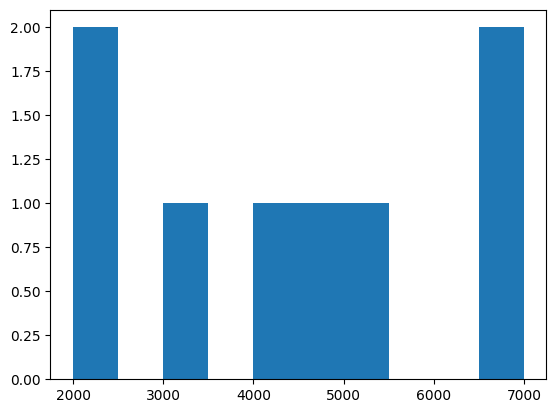

In [26]:
# Histogram of sales
plt.hist(mergedTable['Sales'])
plt.show()

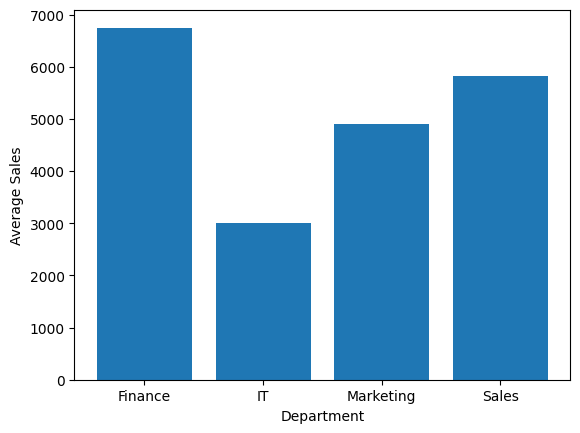

In [ ]:
# Bar chart b/w Departments and their average sales
deptAvgSales = employees.groupby(['Department'])['AverageSales'].mean()
# deptAvgSales.plot(kind='bar')
# print(deptAvgSales)
# print(deptAvgSales.index)
# print(deptAvgSales.values)
plt.bar(deptAvgSales.index, deptAvgSales.values)
plt.xlabel("Department")
plt.ylabel("Average Sales")
plt.show()